In [6]:
import h5py
import numpy as np
import os
from readable_number import ReadableNumber
import matplotlib.pyplot as plt
import seaborn as sns
rn = ReadableNumber
sns.set_theme()

experiment = "capacity_sensitivity"

# config_folders = os.listdir(f"experiments/{experiment}")
configs = ['768MBLLC', '1024MBLLC', '1280MBLLC', '1408MBLLC', '1536MBLLC',  '1792MBLLC', '2048MBLLC']
data_dict = {config:(h5py.File(f"experiments/{experiment}/{config}/data/zsim-ev.h5", 'r')["stats"]["root"]) for config in configs}
#print(data_dict['768MBLLC'][-1]['beefy']['instrs'][0])

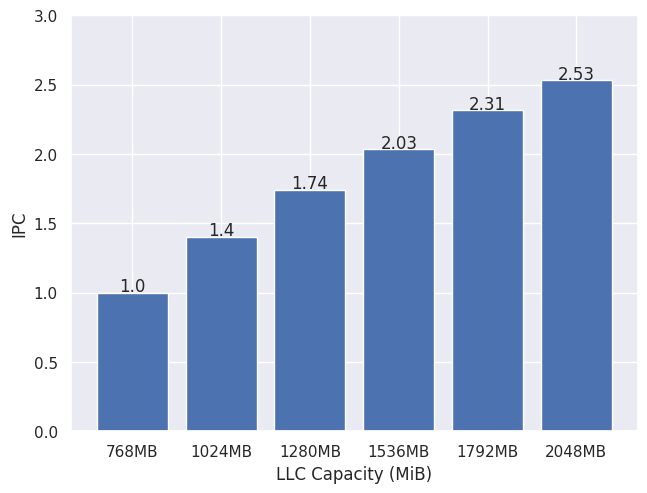

In [7]:
# Create plot for IPC
configs = ['768MBLLC', '1024MBLLC', '1280MBLLC', '1536MBLLC',  '1792MBLLC', '2048MBLLC']
ipcs = []
for k in configs:
    ipcs.append(np.sum(data_dict[k][-1]['beefy']['instrs'])/np.sum(data_dict[k][-1]['beefy']['cycles']))

plt.rcParams["font.family"] = "sans-serif"
ipcs = np.array(ipcs)
ipcs = ipcs/np.min(ipcs)

fig, ax = plt.subplots()
config_labels = ['768MB', '1024MB', '1280MB', '1536MB',  '1792MB', '2048MB']
ax.bar(config_labels, ipcs)

fig.tight_layout()

ax.set_ylabel("IPC")
ax.set_ylim(0,3)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+.01, y[i], ha = 'center')

addlabels(config_labels, np.around(ipcs, decimals=2))

resolution_value = 800
plt.savefig("figs/capacity_sweep.png", format="png", dpi=resolution_value, bbox_inches='tight')


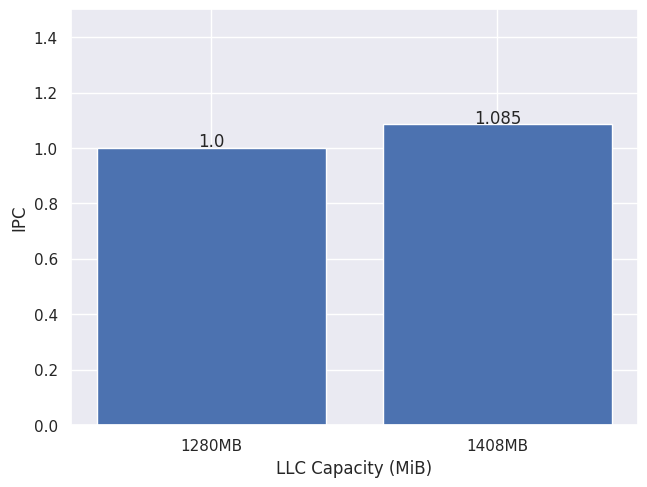

In [8]:
# Create plot for IPC
configs = ['1280MBLLC', '1408MBLLC']
ipcs = []
for k in configs:
    ipcs.append(np.sum(data_dict[k][-1]['beefy']['instrs'])/np.sum(data_dict[k][-1]['beefy']['cycles']))

ipcs = np.array(ipcs)
ipcs = ipcs/np.min(ipcs)

fig, ax = plt.subplots()
config_labels = ['1280MB', '1408MB']
ax.bar(config_labels, ipcs)
fig.tight_layout()

ax.set_ylabel("IPC")
ax.set_ylim(0,1.5)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+.005, y[i], ha = 'center')

addlabels(config_labels, np.around(ipcs, decimals=3))

resolution_value = 800
plt.savefig("figs/uplift.png", format="png", dpi=resolution_value, bbox_inches='tight')

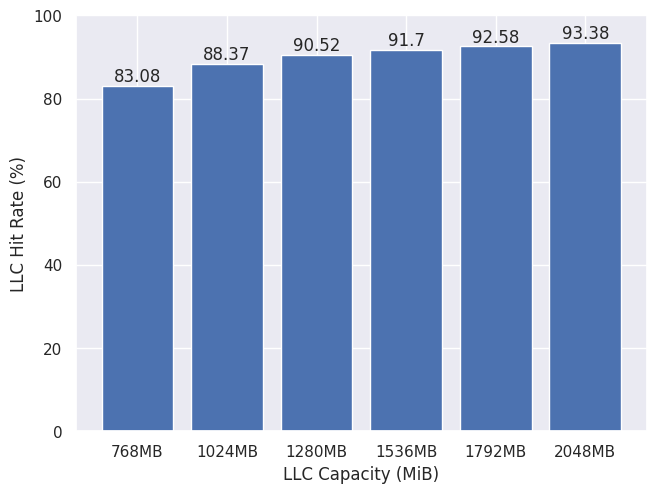

In [9]:
# Create plot for IPC
configs = ['768MBLLC', '1024MBLLC', '1280MBLLC', '1536MBLLC',  '1792MBLLC', '2048MBLLC']
l3_hit_rates = []
for k in configs:
    hGETS = np.sum(data_dict[k][-1]['l3']['hGETS'])
    hGETX = np.sum(data_dict[k][-1]['l3']['hGETX'])
    hits = hGETS + hGETX
    mGETS = np.sum(data_dict[k][-1]['l3']['mGETS'])
    mGETXIM = np.sum(data_dict[k][-1]['l3']['mGETXIM'])
    mGETXSM = np.sum(data_dict[k][-1]['l3']['mGETXSM'])
    misses = hits + mGETS + mGETXIM
    l3_hit_rates.append(hits/misses*100)

l3_hit_rates = np.array(l3_hit_rates)

fig, ax = plt.subplots()
config_labels = ['768MB', '1024MB', '1280MB', '1536MB',  '1792MB', '2048MB']
ax.bar(config_labels, l3_hit_rates)

fig.tight_layout()

ax.set_ylabel("LLC Hit Rate (%)")
ax.set_ylim(0,100)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha = 'center')

addlabels(config_labels, np.around(l3_hit_rates, decimals=2))


resolution_value = 800
plt.savefig("figs/llc_hit_rate.png", format="png", dpi=resolution_value, bbox_inches='tight')


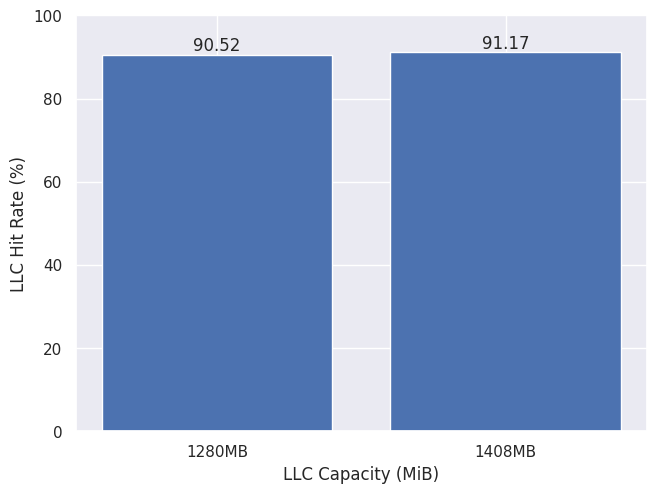

In [10]:
# Create plot for IPC
configs = ['1280MBLLC', '1408MBLLC']
l3_hit_rates = []
for k in configs:
    hGETS = np.sum(data_dict[k][-1]['l3']['hGETS'])
    hGETX = np.sum(data_dict[k][-1]['l3']['hGETX'])
    hits = hGETS + hGETX
    mGETS = np.sum(data_dict[k][-1]['l3']['mGETS'])
    mGETXIM = np.sum(data_dict[k][-1]['l3']['mGETXIM'])
    mGETXSM = np.sum(data_dict[k][-1]['l3']['mGETXSM'])
    misses = hits + mGETS + mGETXIM
    l3_hit_rates.append(hits/misses*100)

l3_hit_rates = np.array(l3_hit_rates)

fig, ax = plt.subplots()
config_labels = ['1280MB', '1408MB']
ax.bar(config_labels, l3_hit_rates)

fig.tight_layout()

ax.set_ylabel("LLC Hit Rate (%)")
ax.set_ylim(0,100)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha = 'center')

addlabels(config_labels, np.around(l3_hit_rates, decimals=2))


resolution_value = 800
plt.savefig("figs/llc_hit_rate_uplift.png", format="png", dpi=resolution_value, bbox_inches='tight')